# Introduction
input intro here


In [42]:
#Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

# To split our data into test and train
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# To create a scatterplot
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer

#To perform Label Encoding and OneHot Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

#Building our custom transformers
from sklearn.base import BaseEstimator, TransformerMixin


In [2]:
# Specify the path to my Excel file
excel_file_path = 'house price dataset\california_house_prices_dataset.xlsx'

# Read the Excel file and store its contents in a DataFrame
housing_dataset = pd.read_excel(excel_file_path)

#Let's view the first 5 values of my dataset
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


# Data Exploration
Here I want to take a look at the various aspects of my dataset.


In [3]:
# Using df.ifo gives a quick overview of my dataset, this includes the no of rows for each feature, it's datatype and the no of rows
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Observation
If you look closely you will observe the following
1. All features except 'ocean_proximity' holds numerical data
2. Our column 'total_bedrooms' appears to have some missing values. We can confirm this in the next step

In [4]:
housing_dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

This confirms it, the 'total_bedrooms' column is missing some data, and 207 at that!

Now let's take a look at my 'ocean_proximity' column, it seems to be hold categorical data (This is data that represents groups or categories). Lets find out how many unique categories there are and the distribution of each category.

In [5]:
housing_dataset.groupby('ocean_proximity')['ocean_proximity'].agg('count')

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
Name: ocean_proximity, dtype: int64

This distribution tells us that there are more house located an hour away from the ocean and very few on the island.





If we want to go further, we can evaluate the mean, standard deviation, and percentiles for each column. We can do this using the '.describe()' method.

In [6]:
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Visualization
We can move further to visualize each column in our data set

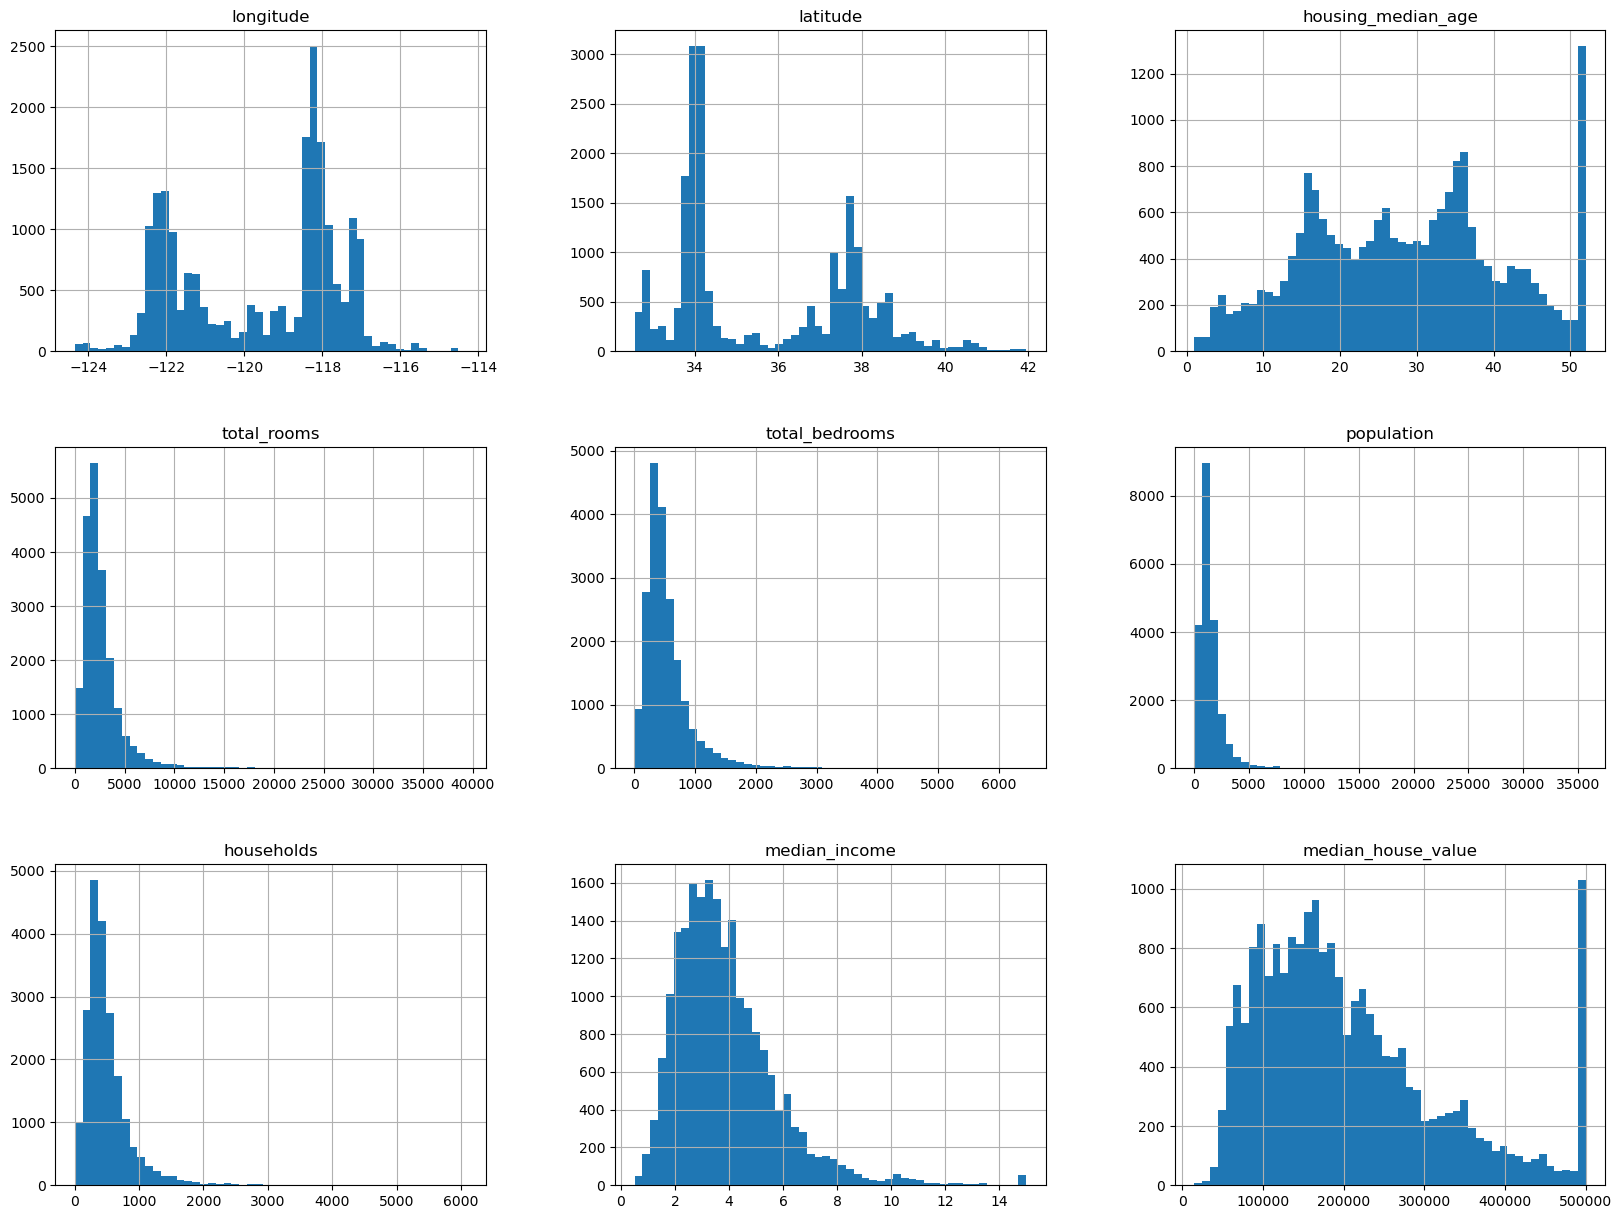

In [7]:
%matplotlib inline
housing_dataset.hist(bins = 50 , figsize=(20 , 15))
plt.show()

### Observations from visualized data
1. Upon observing the 'median_income' feature, I observed that the values range from 0 to 15 which is a bit odd. On further investigation, I got to learn that the values where scaled and capped with 15 for higher median incomes and 0 for lower median income. 
2. I also saw that the 'median_income_value' and 'housing_median_age' also seem to be capped and this can have adverse effects on my ML model. There are two ways to approach this: 
    * Going further to research and find the right values
    * Simply removing such data from my training and testing set.

## Creating our training and testing sets


In [8]:
train_set, test_set = train_test_split(housing_dataset, test_size = 0.2, random_state = 42)

In [9]:
housing_dataset["income_cat"] = np.ceil(housing_dataset["median_income"] / 1.5)
housing_dataset["income_cat"].where(housing_dataset["income_cat"] < 5, 5.0, inplace=True)
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,4.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,3.0


<AxesSubplot: >

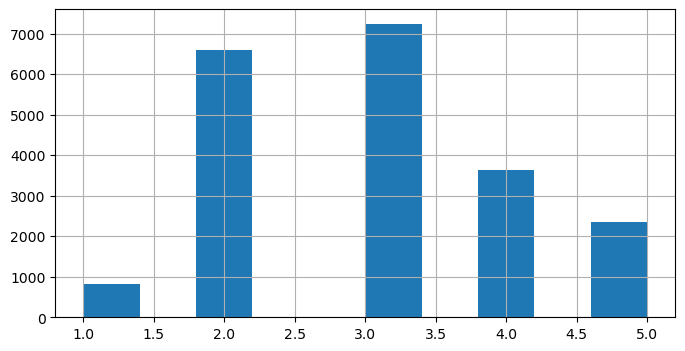

In [10]:
housing_dataset["income_cat"].hist(figsize=(8 , 4))

In [11]:
#Performing stratified sampling
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_dataset, housing_dataset["income_cat"]):
    strat_train_set = housing_dataset.loc[train_index]
    strat_test_set = housing_dataset.loc[test_index]
    
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,5.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,5.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,5.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,4.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,3.0


In [12]:
# Removing the income_cat attribute so the data is back to its originalstate:

for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

## Visualizing Spatial Data with Regards to Population


In [13]:
housing = strat_train_set.copy()

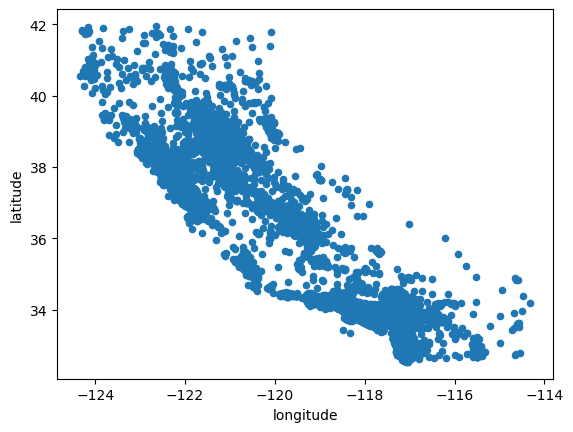

In [14]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

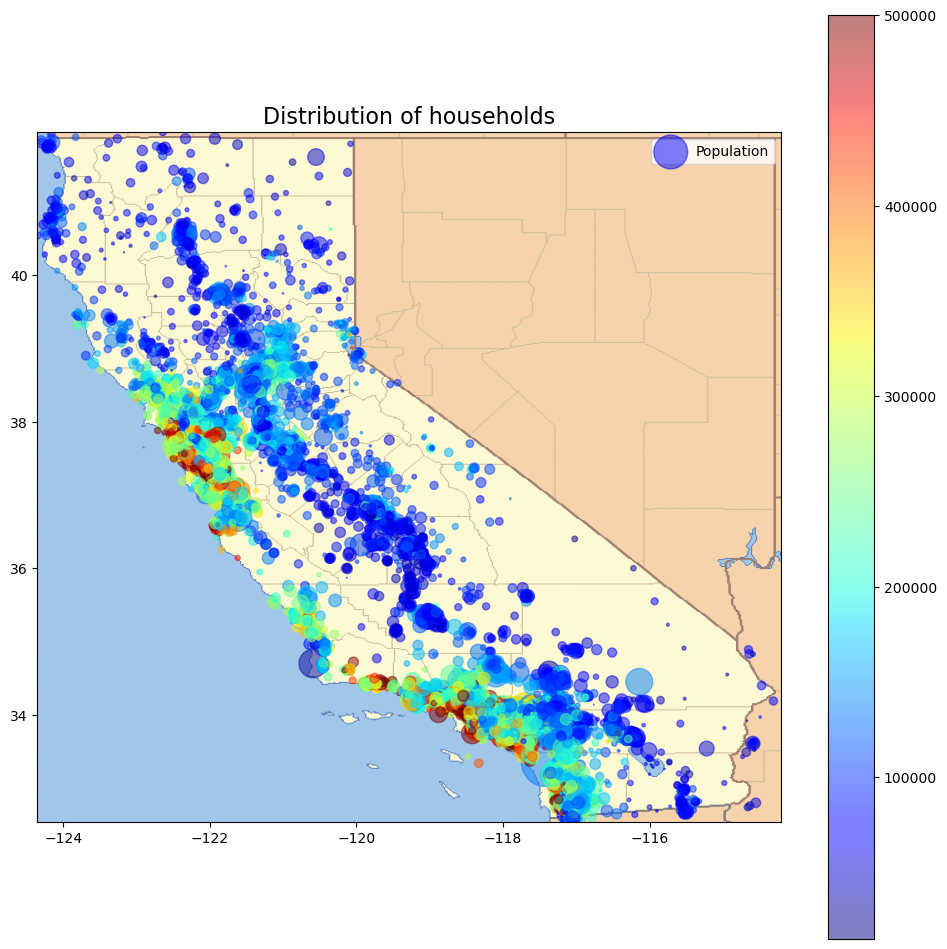

In [15]:
plt.figure(figsize=(12,12))
img=plt.imread('california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=housing['longitude'],y=housing['latitude'],alpha=0.5,s=housing['population']/30,c=housing['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()
plt.show()

## Finding Correlations
We try to find what other features relate directly to 'median_house_value'.

In [16]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

Alternatively, we can use a scatter matrix to better visualize this by gathering the points that seem most related to each other.
These are "median_house_value", "median_income", "total_rooms",
 "housing_median_age"

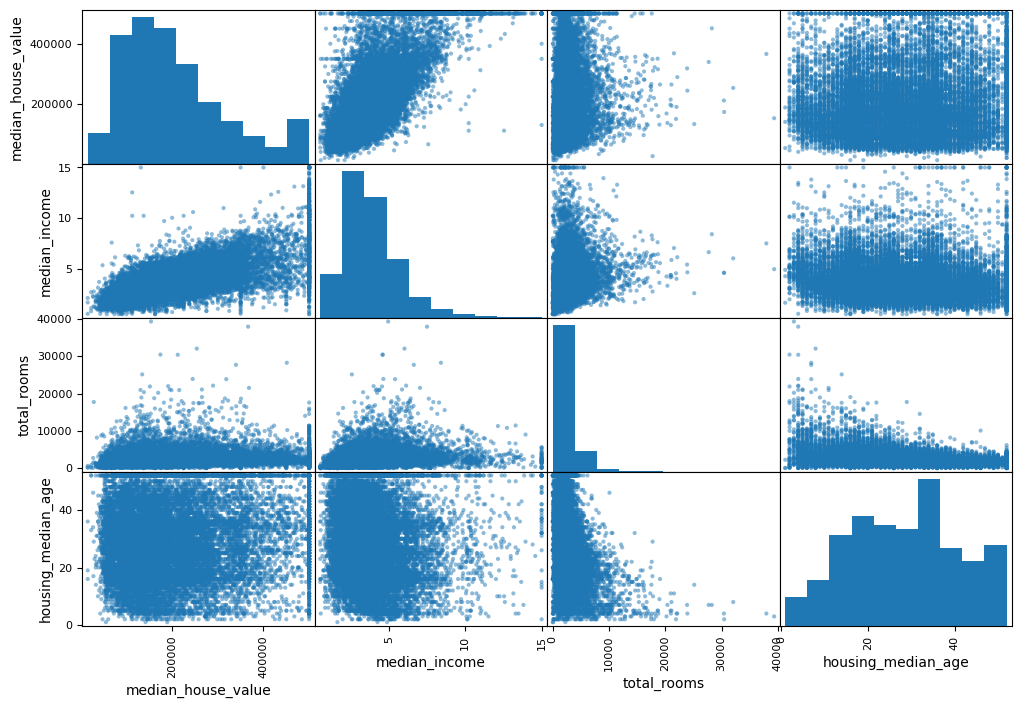

In [17]:
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

we can see some good co-relation between 'median_income' and 'median_house_value', but let's take a good look at that upclose.

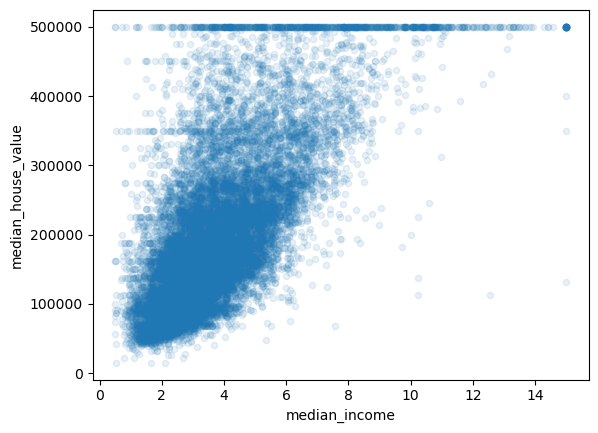

In [18]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

### Combining attributes
Sometimes, combining attributes can help us get a better feature. For example, it would be more helpful to know the number or people in a household, or the number of rooms in a household.
Let's do that now


In [19]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing["bedrooms_per_room"] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29,3873,797.0,2237,706,2.1736,72100,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7,5320,855.0,2015,768,6.3373,279600,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44,1618,310.0,667,300,2.8750,82700,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24,1877,519.0,898,483,2.2264,112500,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27,3536,646.0,1837,580,4.4964,238300,<1H OCEAN,6.096552,0.182692,3.167241


## Data Cleaning

Earlier, I noticed that the 'total_bedrooms' had 207 missing values. Now there are three potential options
   1. We get rid of the missing values
   2. We fill the missing values with a filler value e.g '0', the mean or the median
   3. Get rid of the entire attribute
We'll take the second approach and fill the missing values with the median.


In [20]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median)

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [21]:
# Create an instance of SimpleImputer with the desired strategy (median in this case)
imputer = SimpleImputer(strategy="median")

# Assuming `housing` is your DataFrame, you can use the imputer to handle missing values
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
#housing_num_imputed = imputer.transform(housing_num)
imputer.statistics_
housing_num.median().values

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [25]:
#Now we can replace our missing values with the median values we obtained
X = imputer.transform(housing_num)


housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## Handling Categorical Data

In [38]:
encoder = LabelEncoder()
ocean_proximity_cat = housing["ocean_proximity"]
ocean_proximity_encoded = encoder.fit_transform(ocean_proximity_cat)
ocean_proximity_encoded

array([1, 4, 1, ..., 0, 0, 1])

In [39]:
print(encoder.classes_)
#This means that 0 is mapped to '<1H OCEAN' and 4 is mapped to 'NEAR OCEAN'

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [41]:
encoder = LabelBinarizer()
ocean_proximity_lb_encoded = encoder.fit_transform(ocean_proximity_encoded)
ocean_proximity_lb_encoded

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [43]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

## Creating cusom transformers

In [47]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self #nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)